# Classification with Python

In [55]:
## Librerías 

import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import log_loss

In [4]:
data = pd.read_csv('loan_train.csv')
data.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male
5,7,7,PAIDOFF,1000,30,9/9/2016,10/8/2016,36,college,male
6,8,8,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,male
7,9,9,PAIDOFF,800,15,9/10/2016,9/24/2016,26,college,male
8,10,10,PAIDOFF,300,7,9/10/2016,9/16/2016,29,college,male
9,11,11,PAIDOFF,1000,15,9/10/2016,10/9/2016,39,High School or Below,male


In [9]:
data.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

Tranformamos las variables due_date y effective_date a tipo de fecha: 

In [10]:
data['due_date'] = pd.to_datetime(data['due_date'])
data['effective_date'] = pd.to_datetime(data['effective_date'])
data.dtypes

Unnamed: 0                 int64
Unnamed: 0.1               int64
loan_status               object
Principal                  int64
terms                      int64
effective_date    datetime64[ns]
due_date          datetime64[ns]
age                        int64
education                 object
Gender                    object
dtype: object

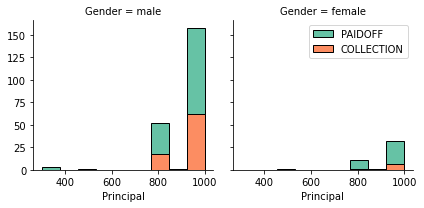

In [19]:
cat = np.linspace(data.Principal.min(), data.Principal.max(), 10)
grafica = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
grafica.map(plt.hist, 'Principal', bins=cat, ec="k")

grafica.axes[-1].legend()
plt.show()

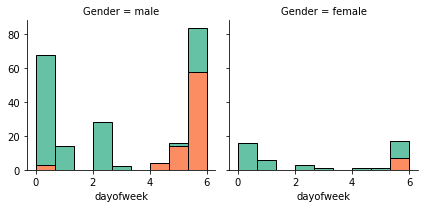

In [20]:
data['dayofweek'] = data['effective_date'].dt.dayofweek
cat = np.linspace(data.dayofweek.min(), data.dayofweek.max(), 10)
grafica = sns.FacetGrid(data, col="Gender", hue="loan_status", palette="Set2", col_wrap=2)
grafica.map(plt.hist, 'dayofweek', bins=cat, ec="k")
g.axes[-1].legend()
plt.show()

We use feature binarization: 

In [21]:
data['weekend'] = data['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
data.head(10)

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1
5,7,7,PAIDOFF,1000,30,2016-09-09,2016-10-08,36,college,male,4,1
6,8,8,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,male,4,1
7,9,9,PAIDOFF,800,15,2016-09-10,2016-09-24,26,college,male,5,1
8,10,10,PAIDOFF,300,7,2016-09-10,2016-09-16,29,college,male,5,1
9,11,11,PAIDOFF,1000,15,2016-09-10,2016-10-09,39,High School or Below,male,5,1


We convert categorical features to numerical values

Male = 0 and Female = 1

In [22]:
data['Gender'].replace(to_replace=["female","male"], value=[1,0],inplace=True)

We will use the hot coding technique to convert categorical variables into binary variables

In [24]:
caracteristicas = pd.concat([data[['Principal','terms','age','Gender','weekend']],
                             pd.get_dummies(data['education'])], axis=1)
caracteristicas.drop(['Master or Above'], axis = 1,inplace=True)
caracteristicas.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


Selection of variables for the model 

In [29]:
X= preprocessing.StandardScaler().fit(data[['Principal',
                                            'terms','age','Gender','weekend']]).transform(data[['Principal','terms','age','Gender','weekend']])

In [28]:
X

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805],
       ...,
       [-1.31458942, -0.95911111,  1.33661351, -0.42056004, -1.20577805],
       [ 0.51578458,  0.92071769, -0.48739188, -0.42056004, -1.20577805],
       [ 0.51578458,  0.92071769, -0.81902922, -0.42056004, -1.20577805]])

Variable target

In [31]:
y = df['loan_status'].values

## Modelos: 

In [33]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=12345)

## K Nearest Neighbor(KNN)

In [37]:
for i in range(1, 10):
    knn_model  = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    knn_yhat = knn_model.predict(x_test)
    print("(k = {} , accuracy = {} )".format(i,accuracy_score(y_test,knn_yhat)))

(k = 1 , accuracy = 0.6571428571428571 )
(k = 2 , accuracy = 0.6142857142857143 )
(k = 3 , accuracy = 0.6428571428571429 )
(k = 4 , accuracy = 0.6 )
(k = 5 , accuracy = 0.6714285714285714 )
(k = 6 , accuracy = 0.6142857142857143 )
(k = 7 , accuracy = 0.7285714285714285 )
(k = 8 , accuracy = 0.6571428571428571 )
(k = 9 , accuracy = 0.7 )


We choose $k=7$

In [38]:
mejor_modelo = KNeighborsClassifier(n_neighbors = 7).fit(x_train, y_train)
mejor_modelo

KNeighborsClassifier(n_neighbors=7)

In [46]:
print("F1 = {}, train ".format(f1_score(y_train, mejor_modelo.predict(x_train), average='weighted')))
print("F1 = {}, test ".format(f1_score(y_test, mejor_modelo.predict(x_test), average='weighted')))

F1 = 0.7604876565640086, train 
F1 = 0.7254386335771361, test 


## Decision Tree

In [48]:
for d in range(1,10):
    dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = d).fit(x_train, y_train)
    dt_yhat = dt.predict(x_test)
    print(" (Depth = {} , Accuracy = {}) ".format(d, accuracy_score(y_test, dt_yhat)))

 (Depth = 1 , Accuracy = 0.7714285714285715) 
 (Depth = 2 , Accuracy = 0.7714285714285715) 
 (Depth = 3 , Accuracy = 0.7714285714285715) 
 (Depth = 4 , Accuracy = 0.7857142857142857) 
 (Depth = 5 , Accuracy = 0.7428571428571429) 
 (Depth = 6 , Accuracy = 0.7714285714285715) 
 (Depth = 7 , Accuracy = 0.7714285714285715) 
 (Depth = 8 , Accuracy = 0.7714285714285715) 
 (Depth = 9 , Accuracy = 0.7714285714285715) 


Select $(Depth = 4 , Accuracy = 0.7857142857142857)$.

In [49]:
modelo_decision = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4).fit(x_train, y_train)
modelo_decision

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [50]:
print("F1 = {}, train ".format(f1_score(y_train, modelo_decision.predict(x_train), average='weighted')))
print("F1 = {}, test ".format(f1_score(y_test, modelo_decision.predict(x_test), average='weighted')))

F1 = 0.6746087913816152, train 
F1 = 0.7239172310942645, test 


## Support Vector Machine

In [52]:
for k in ('linear', 'poly', 'rbf','sigmoid'):
    svm_model = svm.SVC( kernel = k).fit(x_train,y_train)
    svm_yhat = svm_model.predict(x_test)
    print("(Kernel = {}, F1 = {})".format(k,f1_score(y_test,svm_yhat, average='weighted')))

(Kernel = linear, F1 = 0.671889400921659)
(Kernel = poly, F1 = 0.6428571428571429)
(Kernel = rbf, F1 = 0.671889400921659)
(Kernel = sigmoid, F1 = 0.698832298136646)


We use the sigmoid kernel, since $F_1 = 0.698832298136646$.

In [53]:
modelo_svm = svm.SVC(kernel='sigmoid').fit(x_train,y_train)
modelo_svm

SVC(kernel='sigmoid')

In [54]:
print("F1 = {}, train ".format(f1_score(y_train, modelo_svm.predict(x_train), average='weighted')))
print("F1 = {}, test ".format(f1_score(y_test, modelo_svm.predict(x_test), average='weighted')))

F1 = 0.6776486631559095, train 
F1 = 0.698832298136646, test 


## Logistic Regression

In [57]:
for sol in ('lbfgs', 'saga', 'liblinear', 'newton-cg', 'sag'):
    lr_model = LogisticRegression(C = 0.01, solver = sol).fit(x_train, y_train)
    lr_yhat = lr_model.predict(x_test)
    y_prob = lr_model.predict_proba(x_test)
    print('(Solver = {}, Pérdida = {})'.format(sol, log_loss(y_test, y_prob)))

(Solver = lbfgs, Pérdida = 0.4955209544602196)
(Solver = saga, Pérdida = 0.49552319101524084)
(Solver = liblinear, Pérdida = 0.5677464895173423)
(Solver = newton-cg, Pérdida = 0.49552091928381004)
(Solver = sag, Pérdida = 0.4955248497143595)


Select solver = liblinear, because $logloss =  0.5677464895173423$.

In [58]:
modelo_logistico = LogisticRegression(C = 0.01, solver = 'liblinear').fit(x_train, y_train)
modelo_logistico

LogisticRegression(C=0.01, solver='liblinear')

In [59]:
print("F1 = {}, train ".format(f1_score(y_train, modelo_logistico.predict(x_train), average='weighted')))
print("F1 = {}, test ".format(f1_score(y_test, modelo_logistico.predict(x_test), average='weighted')))

F1 = 0.6600247525232485, train 
F1 = 0.671889400921659, test 
